Columns: Index(['date', 'Ex_rate'], dtype='object')


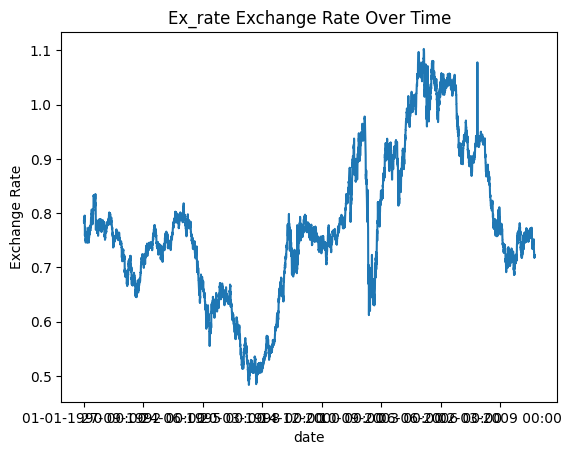

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

#Loading data 
df = pd.read_csv("exchange_rate.csv")
print("Columns:", df.columns)

#assuming first column is date
date_col = df.columns[0]
rate_col = df.columns[1]

#Reloading with date parsing technique 
df = pd.read_csv("exchange_rate.csv", parse_dates=[date_col])
df.set_index(date_col, inplace=True)

# Plotting after date parsing
df[rate_col].plot(title=f"{rate_col} Exchange Rate Over Time")
plt.ylabel("Exchange Rate")
plt.show()


ADF Statistic: -1.66499418073814
p-value: 0.4492327353597968


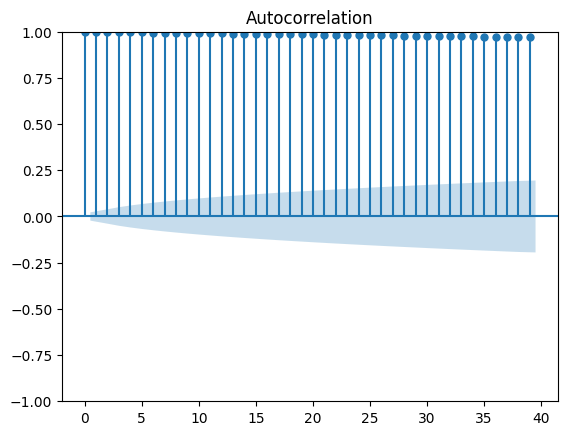

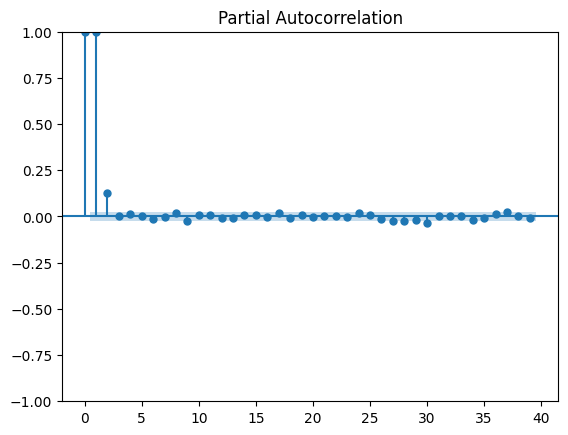

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Thu, 03 Jul 2025   AIC                         -56102.322
Time:                        18:22:03   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

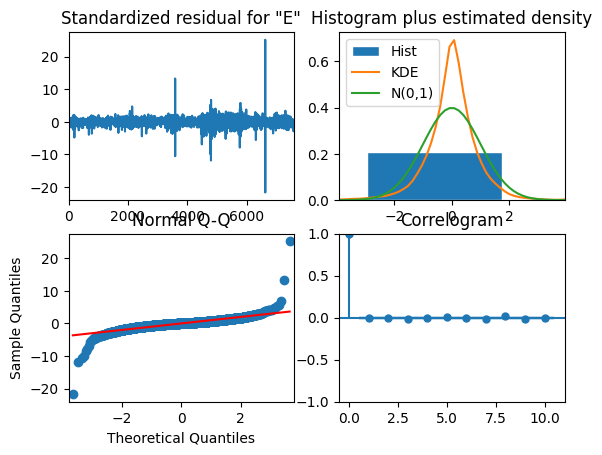

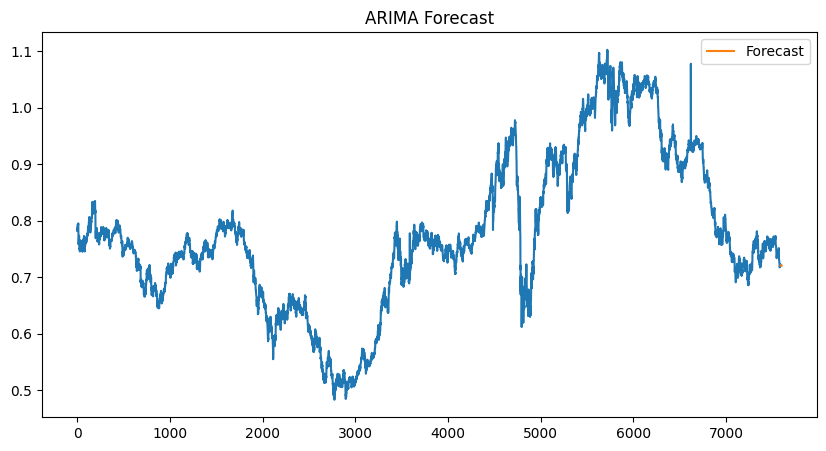

In [9]:
#adjusting arima model
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Checking stationarity
result = adfuller(df['Ex_rate'])  # Replace with actual column name
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# Plotting ACF & PACF
plot_acf(df['Ex_rate'])
plot_pacf(df['Ex_rate'])
plt.show()

# Fitting into ARIMA model
model_arima = ARIMA(df['Ex_rate'], order=(1,1,1))
model_fit_arima = model_arima.fit()
print(model_fit_arima.summary())

# Residuals
model_fit_arima.plot_diagnostics()
plt.show()

# Forecasting next 12 periods
forecast_arima = model_fit_arima.forecast(steps=12)
df['Ex_rate'].plot(label='Actual', figsize=(10,5))
forecast_arima.plot(label='Forecast', legend=True)
plt.title("ARIMA Forecast")
plt.show()


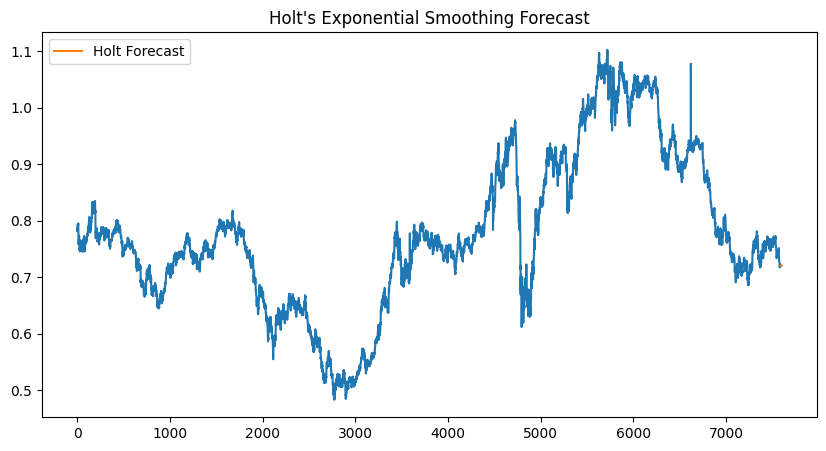

In [10]:
#smooting
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fitting Holt's Linear Trend method
model_holt = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal=None)
model_fit_holt = model_holt.fit()

# Forecasting next 12 values
forecast_holt = model_fit_holt.forecast(steps=12)

# Plotting forecast
df['Ex_rate'].plot(label='Actual', figsize=(10,5))
forecast_holt.plot(label='Holt Forecast', legend=True)
plt.title("Holt's Exponential Smoothing Forecast")
plt.show()

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# True values for evaluation
test = df['Ex_rate'][-12:]
pred_arima = model_fit_arima.forecast(steps=12)
pred_holt = model_fit_holt.forecast(steps=12)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Error metrics
print("ARIMA MAE:", mean_absolute_error(test, pred_arima))
print("ARIMA RMSE:", np.sqrt(mean_squared_error(test, pred_arima)))
print("ARIMA MAPE:", mape(test, pred_arima))

print("Holt MAE:", mean_absolute_error(test, pred_holt))
print("Holt RMSE:", np.sqrt(mean_squared_error(test, pred_holt)))
print("Holt MAPE:", mape(test, pred_holt))

ARIMA MAE: 0.001664492434046964
ARIMA RMSE: 0.002000358073456273
ARIMA MAPE: nan
Holt MAE: 0.001672617838970658
Holt RMSE: 0.0019971992595430067
Holt MAPE: nan


In [6]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   --------- ------------------------------ 2.4/9.9 MB 12.2 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.9 MB 11.9 MB/s eta 0:00:01
   --------------------------- ------------ 6.8/9.9 MB 11.6 MB/s eta 0:00:01
   ------------------------------------- -- 9.2/9.9 MB 11.4 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 11.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
